In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("DL4SE lit review.xlsx", sheet_name=1)

In [3]:
df.head()

,Number,Title,Link to paper,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,None,21
0,1.0,Deep Semantic Feature Learning for Software De...,https://www.cs.purdue.edu/homes/lintan/publica...,No,No,Yes,ICSE,defect prediction,Sequence,grid search,Code only,19.0
1,2.0,CRADLE: Cross-Backend Validation to Detect and...,https://www.cs.purdue.edu/homes/lintan/publica...,No,Yes,No,ICSE,bug localization,Convolutional,none,Data only,23.0
2,3.0,A Neural Language Model with a Modified Attent...,https://ieeexplore.ieee.org/document/8663962,No,Yes,Yes,ICSESS,language model,Sequence,none,Code and Data,35.0
3,4.0,How Well Do Change Sequences Predict Defects? ...,http://sccpu2.cse.ust.hk/castle/materials/TSE1...,No,Yes,Yes,TSE,defect prediction,Sequence,none,NaN,NaN
4,5.0,DeepJIT: An End-to-End Deep Learning Framework...,https://posl.ait.kyushu-u.ac.jp/~kamei/publica...,Yes,Yes,No,MSR,defect prediction,Convolutional,cross validation,NaN,NaN


In [4]:
df.groupby(["SE task", "Method"]).apply(lambda df: len(df))

SE task                  Method             
Clone Detection          Convolutional           2
                         DNN                     1
                         Feedforward             1
                         Sequence                2
Code Synthesis           Attention               1
                         Convolutional           4
                         Embedding               1
                         Other                   1
                         Sequence               16
Feature Envy Detection   Convolutional           1
Program Repair           Other                   1
                         Sequence                4
Software Categorization  DNN                     1
                         Sequence                1
Software Energy Metrics  Feedforward             1
Vulnerability Detection  Convolutional           1
                         Graph                   1
                         Sequence                2
bug localization         Convolutiona

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data = df.groupby(["SE task", "Method"]).apply(lambda df: len(df))

In [7]:
data.shape

(38,)

In [8]:
data

SE task                  Method             
Clone Detection          Convolutional           2
                         DNN                     1
                         Feedforward             1
                         Sequence                2
Code Synthesis           Attention               1
                         Convolutional           4
                         Embedding               1
                         Other                   1
                         Sequence               16
Feature Envy Detection   Convolutional           1
Program Repair           Other                   1
                         Sequence                4
Software Categorization  DNN                     1
                         Sequence                1
Software Energy Metrics  Feedforward             1
Vulnerability Detection  Convolutional           1
                         Graph                   1
                         Sequence                2
bug localization         Convolutiona

In [9]:
pd.DataFrame(data)

0
SE task                 Method                 
Clone Detection         Convolutional         2
                        DNN                   1
                        Feedforward           1
                        Sequence              2
Code Synthesis          Attention             1
                        Convolutional         4
                        Embedding             1
                        Other                 1
                        Sequence             16
Feature Envy Detection  Convolutional         1
Program Repair          Other                 1
                        Sequence              4
Software Categorization DNN                   1
                        Sequence              1
Software Energy Metrics Feedforward           1
Vulnerability Detection Convolutional         1
                        Graph                 1
                        Sequence              2
bug localization        Convolutional         1
                        Other                 1
code comprehension      Convolutional         2
                        Embedding             1
                        Graph                 1
                        Sequence             11
                        word2vec              1
code smell              Embedding             1
defect prediction       Convolutional         1
                        Deep Belief Network   1
                        Embedding             1
                        Sequence              5
image processing        Convolutional         1
language model          Convolutional         1
                        Embedding             2
                        Sequence              9
language processing     Convolutional         4
                        Feedforward           1
                        Sequence              6
                        word2vec              1

In [10]:
idx_len = len(np.unique(df["SE task"].dropna()))
col_len = len(np.unique(df["Method"].dropna()))

In [11]:
np.unique(df["SE task"].dropna())

array(['Clone Detection', 'Code Synthesis', 'Feature Envy Detection',
       'Program Repair', 'Software Categorization',
       'Software Energy Metrics', 'Vulnerability Detection',
       'bug localization', 'code comprehension', 'code smell',
       'defect prediction', 'duplicate bug detection', 'image processing',
       'language model', 'language processing'], dtype=object)

In [12]:
idx = []
cols = []
dat = np.zeros(shape=(idx_len-1, col_len))

for index, group in df.groupby(["SE task", "Method"]):
    if index[0] not in idx:
        idx.append(index[0])
    if index[1] not in cols:
        cols.append(index[1])
        
    i = idx.index(index[0])
    j = cols.index(index[1])
    dat[i][j] = len(group)

In [13]:
print(len(idx), len(cols), dat.shape)

14 10 (14, 10)


In [14]:
plot_data = pd.DataFrame(data=dat, index=idx, columns=cols)

In [15]:
plot_data.head()

,Convolutional,DNN,Feedforward,Sequence,Attention,Embedding,Other,Graph,word2vec,Deep Belief Network
Clone Detection,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Code Synthesis,4.0,0.0,0.0,16.0,1.0,1.0,1.0,0.0,0.0,0.0
Feature Envy Detection,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Program Repair,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
Software Categorization,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
plot_data.loc["total", :] = plot_data.sum(axis=0)

In [17]:
plot_data.loc[:, "total"] = plot_data.sum(axis=1)

In [18]:
plot_data

,Convolutional,DNN,Feedforward,Sequence,Attention,Embedding,Other,Graph,word2vec,Deep Belief Network,total
Clone Detection,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Code Synthesis,4.0,0.0,0.0,16.0,1.0,1.0,1.0,0.0,0.0,0.0,23.0
Feature Envy Detection,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Program Repair,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
Software Categorization,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Software Energy Metrics,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Vulnerability Detection,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
bug localization,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
code comprehension,2.0,0.0,0.0,11.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0
code smell,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
plot_data = plot_data.sort_values(by='total', ascending=False, axis=1).sort_values(by='total', axis=0, ascending=False)

In [20]:
plot_data = plot_data.drop('total', axis=0).drop('total', axis=1)

In [21]:
plot_data.index

Index(['Code Synthesis', 'code comprehension', 'language model',
       'language processing', 'defect prediction', 'Clone Detection',
       'Program Repair', 'Vulnerability Detection', 'Software Categorization',
       'bug localization', 'Feature Envy Detection', 'Software Energy Metrics',
       'code smell', 'image processing'],
      dtype='object')

In [22]:
plot_data.columns

Index(['Sequence', 'Convolutional', 'Embedding', 'Feedforward', 'Other', 'DNN',
       'Graph', 'word2vec', 'Attention', 'Deep Belief Network'],
      dtype='object')

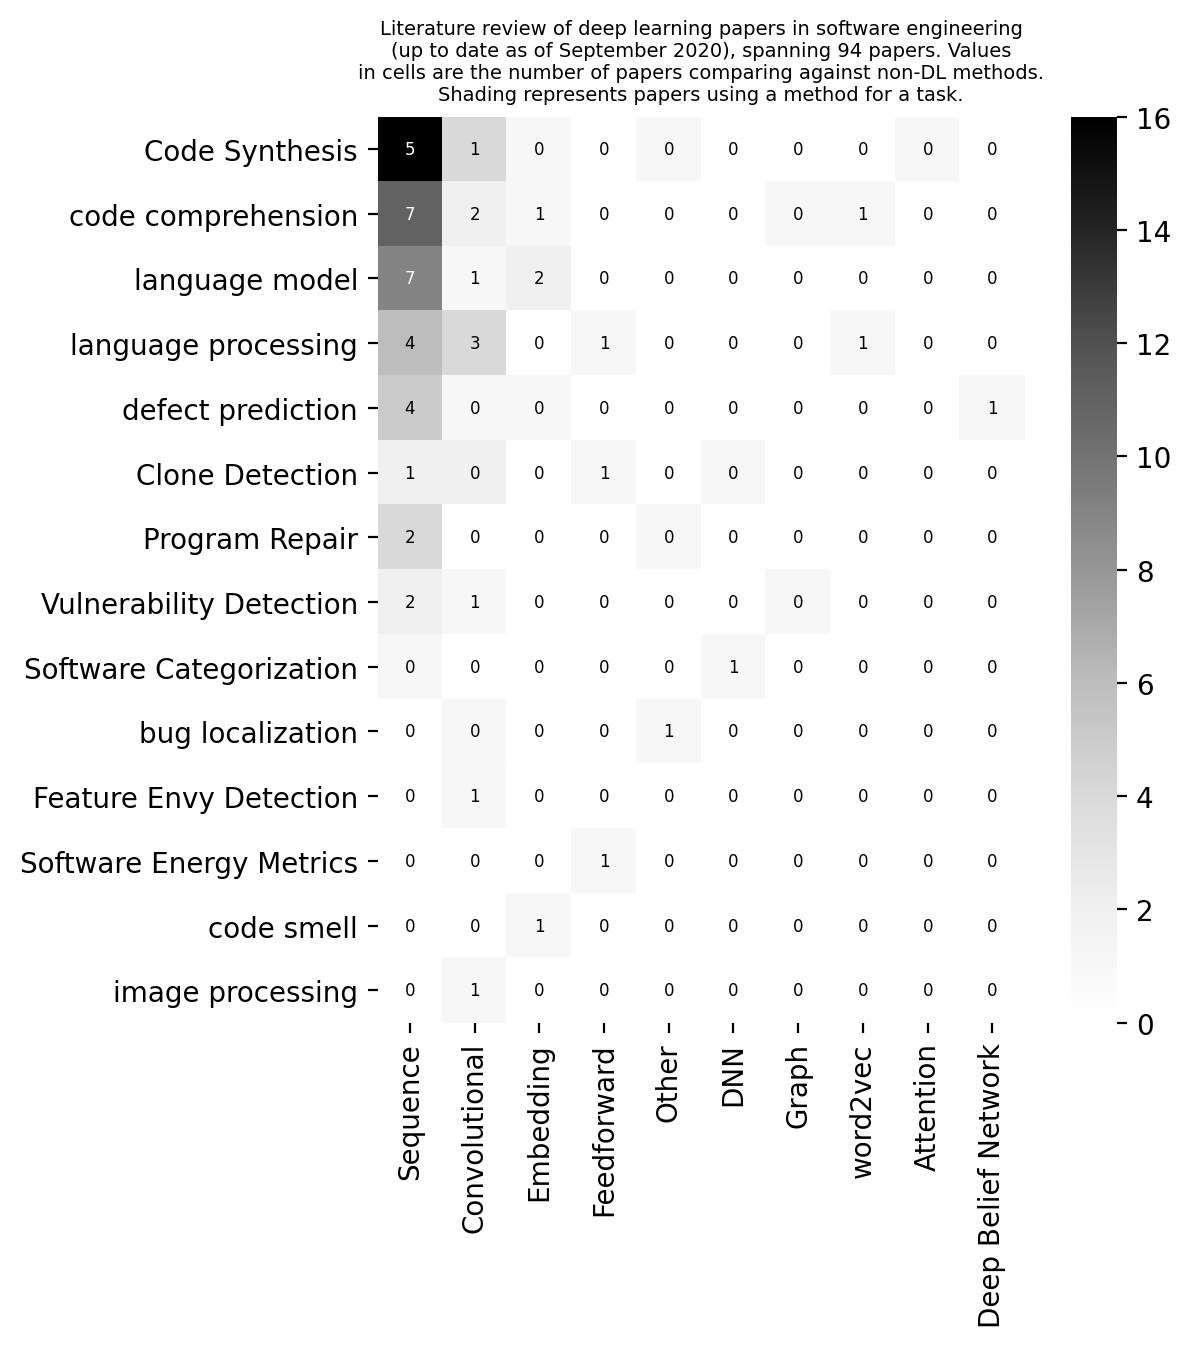

In [28]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys');
_.savefig("./heatmap-nondl.jpg", bbox_inches='tight', pad_inches=.2)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Compare to non-DL?'] == 'Yes') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        plt.text(x + 0.5, y + 0.5, '{0}'.format(m),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6}
                 )

plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers comparing against non-DL methods.\nShading represents papers using a method for a task.', fontdict={'size': 7});

In [29]:
plot_data.sum().sum()

94.0

In [30]:
df[(df['Compare to non-DL?'] == 'Yes') & (df['SE task'] == plot_data.index[0]) & (df['Method'] == plot_data.columns[1])]

,Number,Title,Link to paper,Code?,Data?,Compare to non-DL?,Venue,SE task,Method,Hyperparam tuning,None,21
101,90.0,Machine learning-based prototyping of graph- i...,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Yes,Yes,Yes,TSE,Code Synthesis,Convolutional,none,NaN,NaN


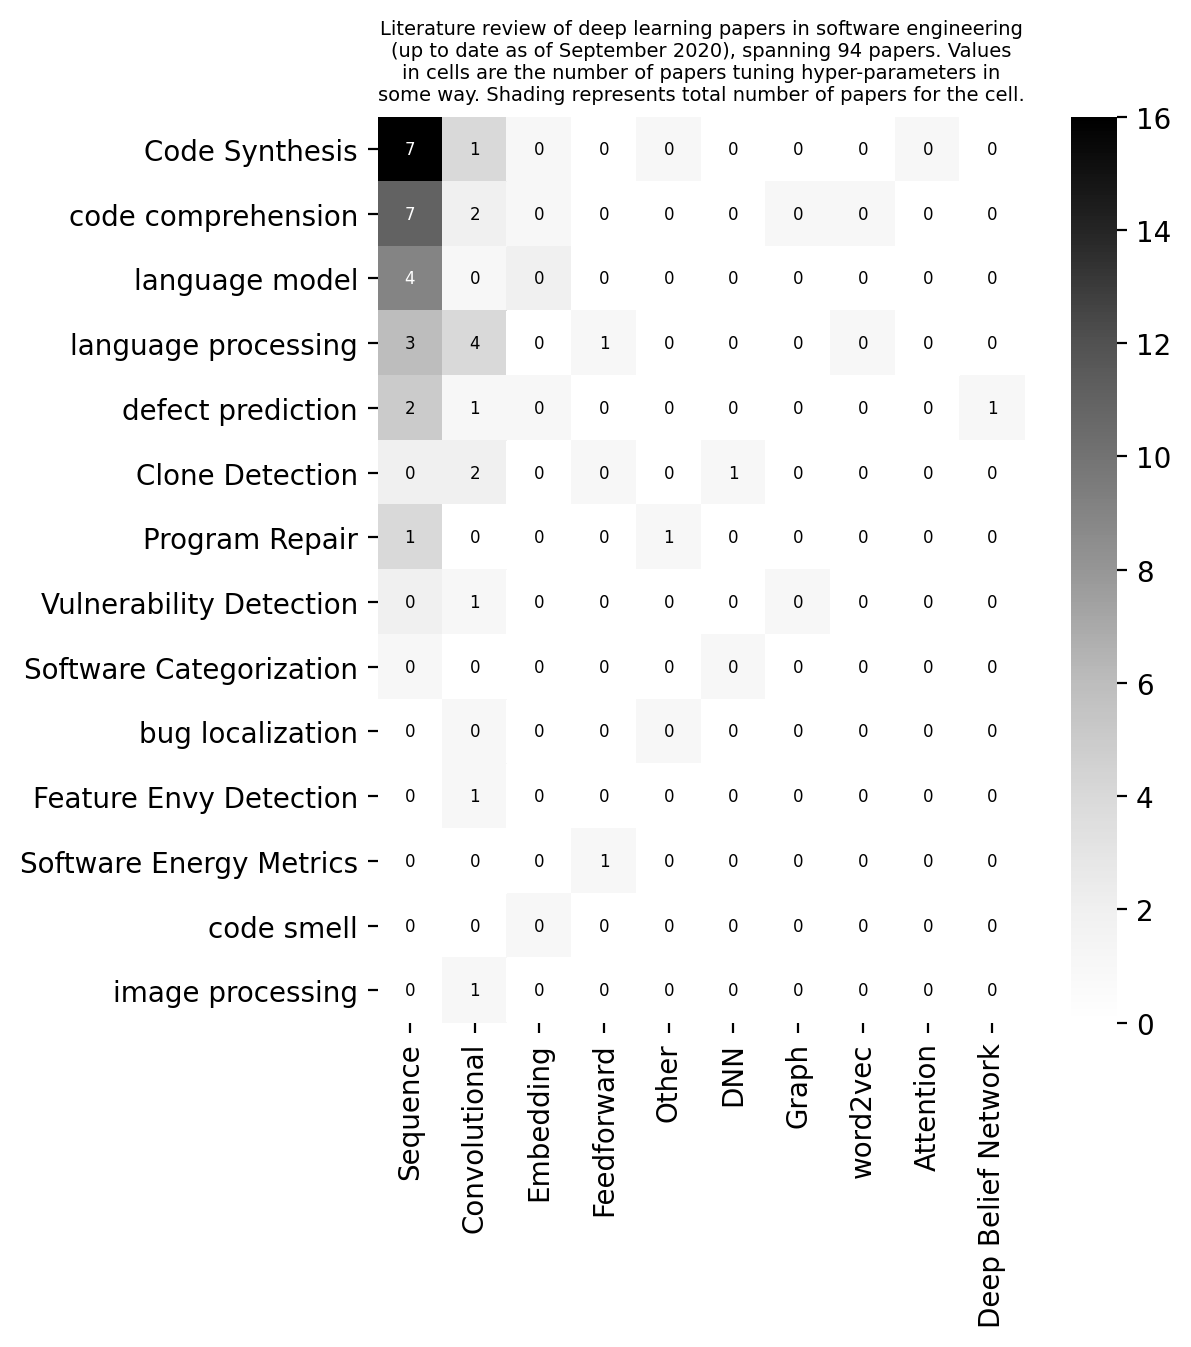

In [32]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys');
_.savefig("./heatmap-hyp.jpg", bbox_inches='tight', pad_inches=.2)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'none') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        plt.text(x + 0.5, y + 0.5, '{0}'.format(m),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6}
                 )

plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers tuning hyper-parameters in\nsome way. Shading represents total number of papers for the cell.', fontdict={'size': 7});

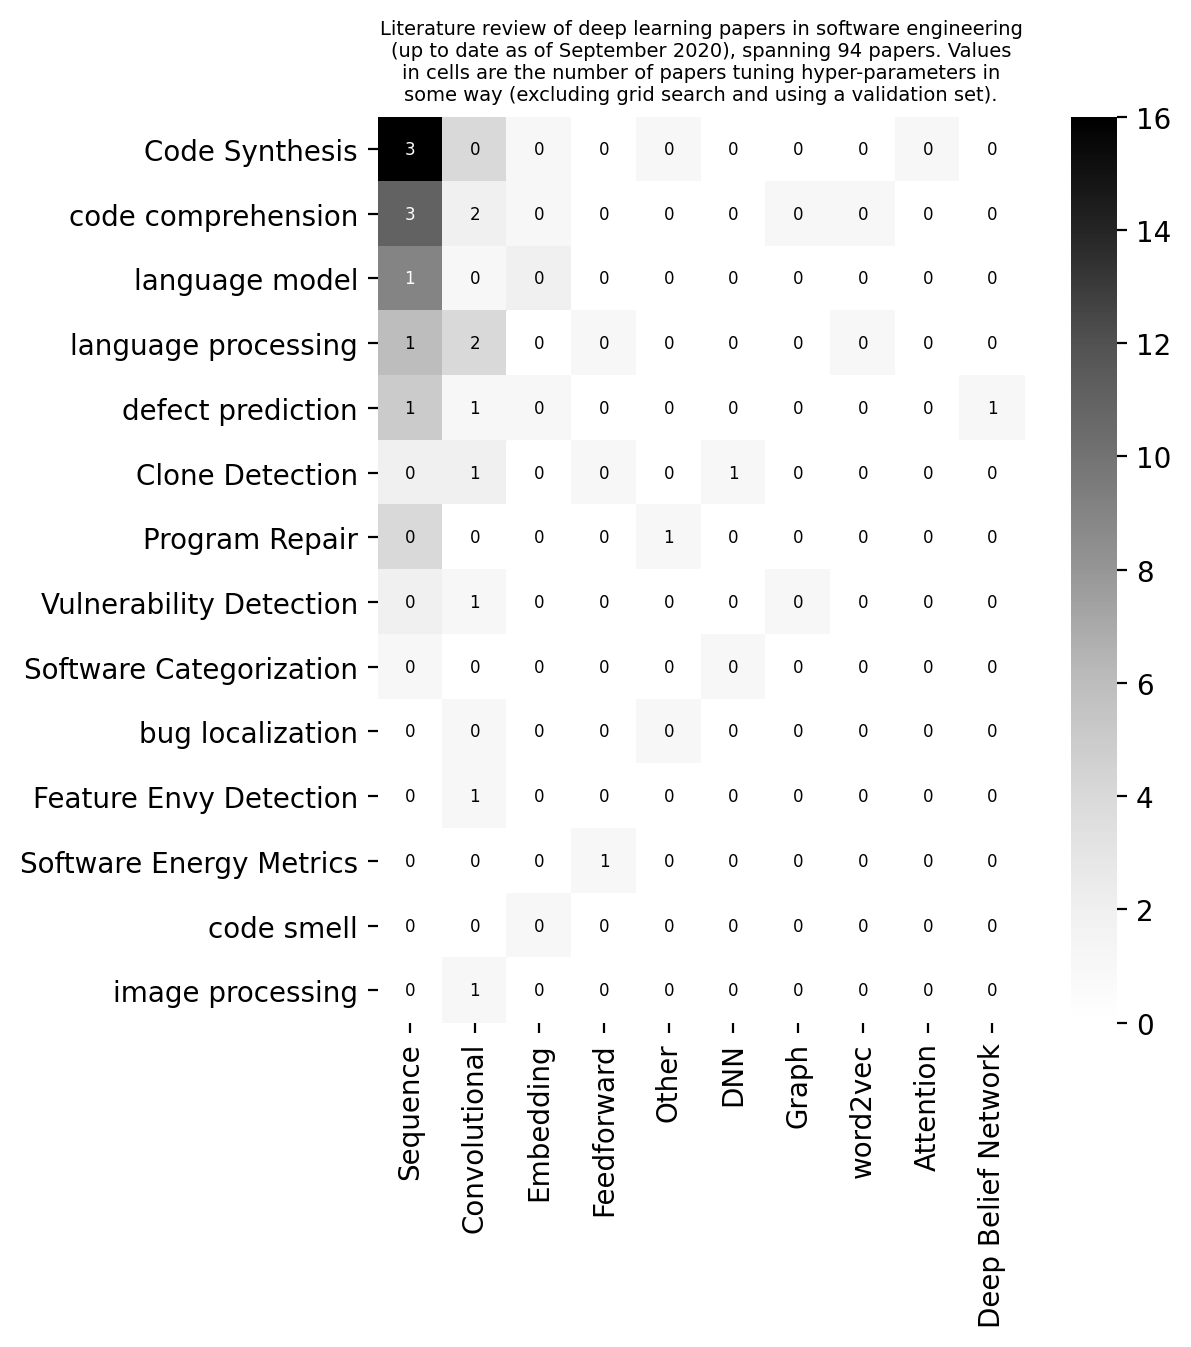

In [35]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys');
_.savefig("./heatmap-hyp-nontrivial.jpg", bbox_inches='tight', pad_inches=.2)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        m = len(df[(df['Hyperparam tuning'] != 'none') & (df['Hyperparam tuning'] != 'dev set') & (df['Hyperparam tuning'] != 'grid search') & (df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        plt.text(x + 0.5, y + 0.5, '{0}'.format(m),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6}
                 )

plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers tuning hyper-parameters in\nsome way (excluding grid search and using a validation set).', fontdict={'size': 7});

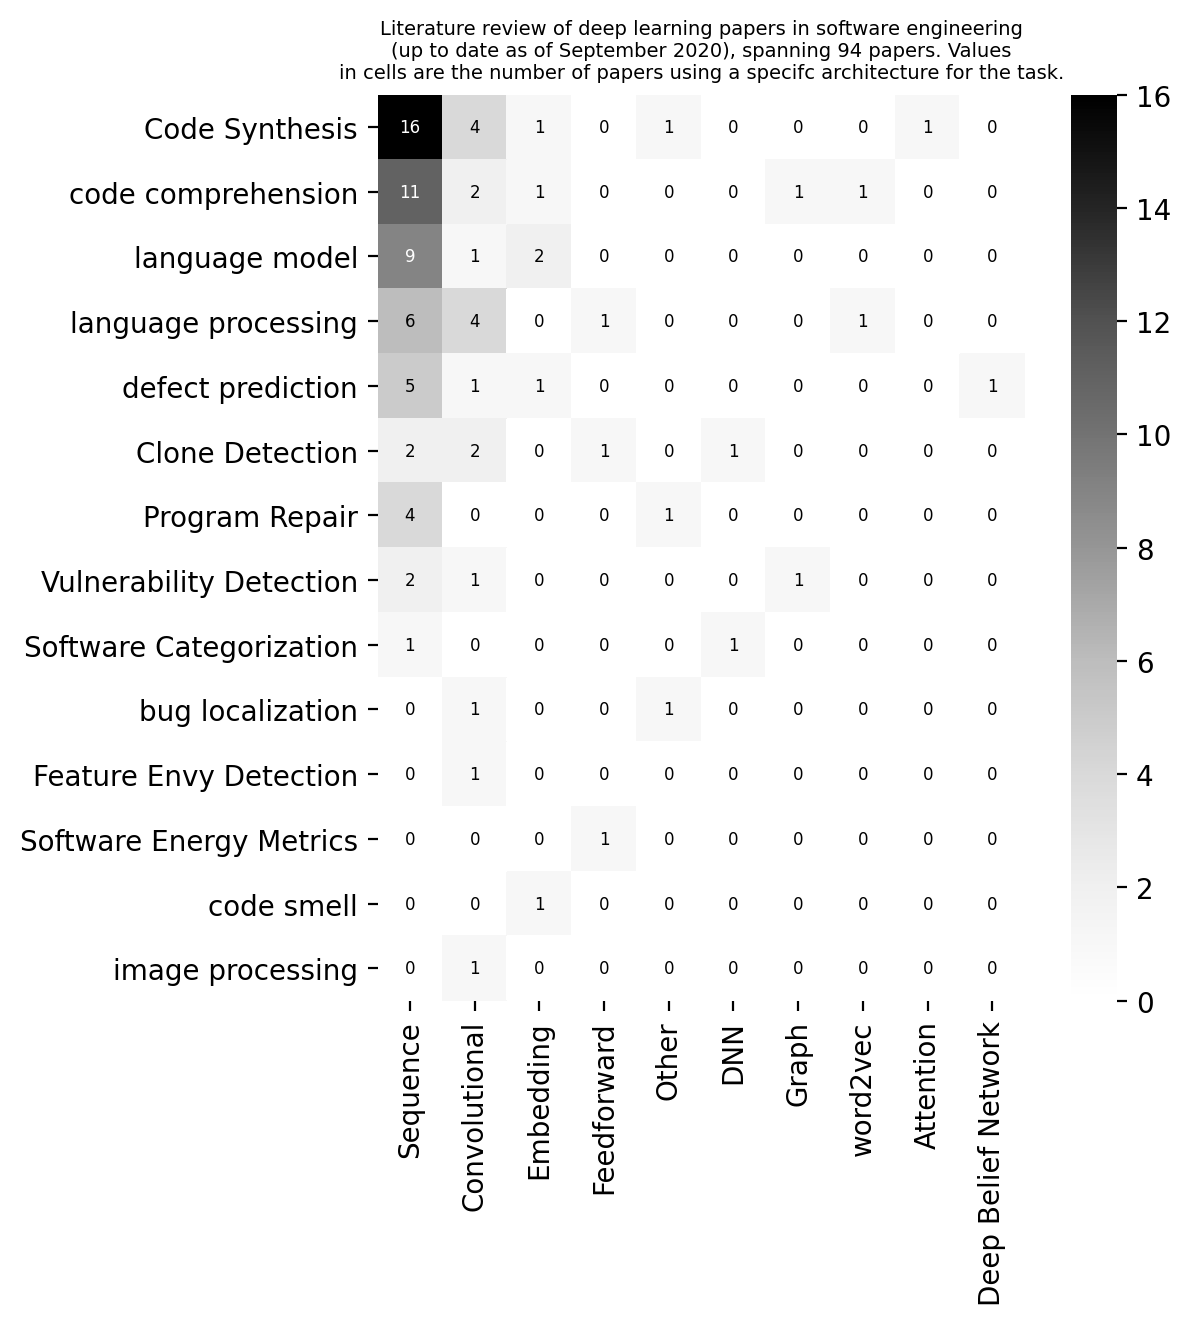

In [36]:
_, ax = plt.subplots(figsize=(6, 6), dpi=200)
sns.heatmap(plot_data, square=True, ax=ax, cmap='Greys');
_.savefig("./heatmap-total.jpg", bbox_inches='tight', pad_inches=.2)

for y in range(plot_data.shape[0]):
    for x in range(plot_data.shape[1]):
        n = len(df[(df['SE task'] == plot_data.index[y]) & (df['Method'] == plot_data.columns[x])])
        plt.text(x + 0.5, y + 0.5, '{0}'.format(n),
                 horizontalalignment='center',
                 verticalalignment='center',
                 c=('white' if (y == 0 and x < 1 or x == 0 and y < 3) else 'black'), 
                 fontdict={'size': 6}
                 )

plt.title('Literature review of deep learning papers in software engineering\n(up to date as of September 2020), spanning 94 papers. Values\nin cells are the number of papers using a specifc architecture for the task.', fontdict={'size': 7});